# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_breast_cancer

In [13]:
data = load_breast_cancer()

In [14]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [15]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [16]:
df = pd.DataFrame(data.data , columns = data.feature_names)

In [17]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
X = df

In [18]:
y = data.target

In [20]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
# train_test_split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [29]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 57,   6],
       [  7, 101]])

In [32]:
accuracy_score(y_test,y_pred)

0.9239766081871345

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [34]:
from sklearn.metrics import roc_curve , auc

In [35]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [36]:
#calculate ROC curve
fpr,tpr,thresholds = roc_curve(y_test , y_pred_proba)

In [37]:
# calculate AUC score
roc_auc = auc(fpr,tpr)

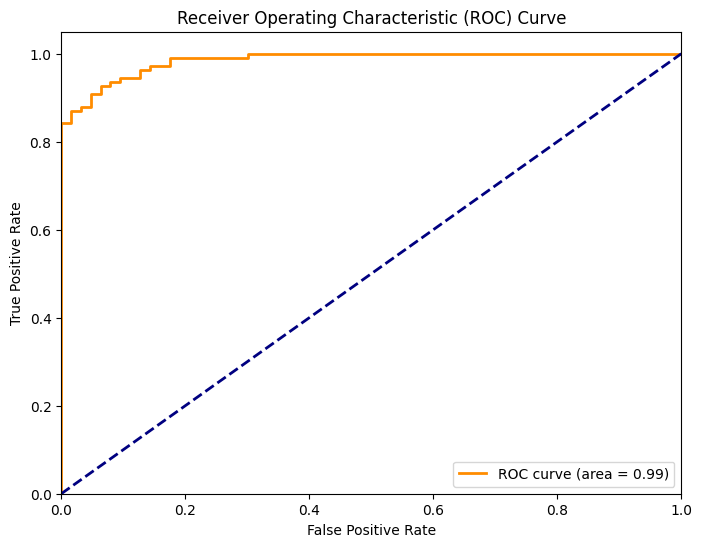

In [38]:
#plot roc-auc curve

plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

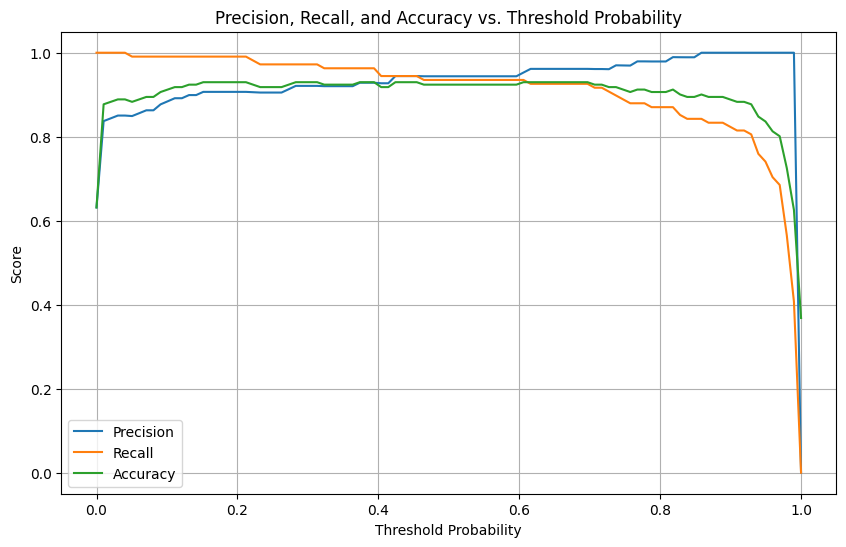

In [39]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot precision, recall, and accuracy against threshold probabilities
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
new_pred_levels = np.where(y_pred_proba > 0.6, 1, 0)

In [41]:
new_pred_levels

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [42]:
confusion_matrix(y_test, new_pred_levels)

array([[ 57,   6],
       [  7, 101]])

In [43]:
accuracy_score(y_test, new_pred_levels)

0.9239766081871345

In [44]:
print(classification_report(y_test, new_pred_levels))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

In [55]:
from sklearn.model_selection import GridSearchCV
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100],"penalty": ["l1"], "solver" : ["liblinear"]}

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [57]:
clf = GridSearchCV(model,param_grid = params,cv=5,verbose=2)
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             verbose=2)

In [58]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             verbose=2)

In [61]:
clf.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [62]:
print("Best Score:", clf.best_score_)

Best Score: 0.9546835443037974


In [63]:
clf.best_estimator_.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [64]:
clf.best_estimator_.predict_proba(X_test)

array([[1.12154421e-02, 9.88784558e-01],
       [9.99973715e-01, 2.62854216e-05],
       [2.85669226e-04, 9.99714331e-01],
       [9.99999086e-01, 9.14374315e-07],
       [9.96843960e-01, 3.15603984e-03],
       [9.99995842e-01, 4.15792872e-06],
       [1.00000000e+00, 7.86125121e-12],
       [9.99713104e-01, 2.86896301e-04],
       [1.21414266e-03, 9.98785857e-01],
       [7.48849569e-03, 9.92511504e-01],
       [8.40311767e-05, 9.99915969e-01],
       [9.99984961e-01, 1.50390729e-05],
       [9.98885328e-01, 1.11467151e-03],
       [3.06889719e-05, 9.99969311e-01],
       [6.13480622e-01, 3.86519378e-01],
       [9.28779060e-03, 9.90712209e-01],
       [5.08861959e-06, 9.99994911e-01],
       [1.41987120e-03, 9.98580129e-01],
       [1.80986585e-05, 9.99981901e-01],
       [1.00000000e+00, 1.82868305e-11],
       [1.49840855e-05, 9.99985016e-01],
       [9.51022580e-05, 9.99904898e-01],
       [9.99999995e-01, 4.74482518e-09],
       [2.58676240e-04, 9.99741324e-01],
       [9.999947

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 57   6]
 [  7 101]]
0.9239766081871345
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [67]:
# Randomized Search CV >> it will take randomly some combination

In [71]:
from sklearn.model_selection import RandomizedSearchCV
randomized_clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, verbose=2)
randomized_clf

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [72]:
randomized_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solve

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [73]:
# Print best parameters and best score
print("Best Parameters:", randomized_clf.best_params_)
print("Best Score:", randomized_clf.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best Score: 0.9723101265822784


In [74]:
randomized_clf.best_estimator_.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [75]:
randomized_clf.best_estimator_.predict_proba(X_test)

array([[1.01692080e-01, 8.98307920e-01],
       [1.00000000e+00, 3.57667736e-10],
       [9.99492503e-01, 5.07497309e-04],
       [6.58192679e-05, 9.99934181e-01],
       [1.89527981e-05, 9.99981047e-01],
       [1.00000000e+00, 1.33612817e-12],
       [1.00000000e+00, 2.16768601e-15],
       [9.96222058e-01, 3.77794197e-03],
       [2.45280096e-02, 9.75471990e-01],
       [7.66385957e-04, 9.99233614e-01],
       [3.06144573e-02, 9.69385543e-01],
       [9.99890423e-01, 1.09577115e-04],
       [1.48154536e-03, 9.98518455e-01],
       [9.63985500e-01, 3.60145004e-02],
       [1.48280457e-03, 9.98517195e-01],
       [9.99437816e-01, 5.62183947e-04],
       [4.78720788e-04, 9.99521279e-01],
       [1.38475038e-06, 9.99998615e-01],
       [1.19405738e-05, 9.99988059e-01],
       [1.00000000e+00, 1.64802252e-10],
       [4.06504060e-02, 9.59349594e-01],
       [8.18763062e-04, 9.99181237e-01],
       [1.00000000e+00, 3.24775385e-13],
       [2.73168690e-04, 9.99726831e-01],
       [1.249217

In [76]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25 38]
 [39 69]]
0.5497076023391813
              precision    recall  f1-score   support

           0       0.39      0.40      0.39        63
           1       0.64      0.64      0.64       108

    accuracy                           0.55       171
   macro avg       0.52      0.52      0.52       171
weighted avg       0.55      0.55      0.55       171



In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "penalty": ["l1"], "solver": ["liblinear"]}

# Initialize Logistic Regression model
model = LogisticRegression()

# ✅ Grid Search CV
clf = GridSearchCV(model, param_grid=params, cv=5, verbose=2)
clf.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

# Predictions using best model
y_pred = clf.best_estimator_.predict(X_test)
y_pred_proba = clf.best_estimator_.predict_proba(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Randomized Search CV
randomized_clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, verbose=2)
randomized_clf.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Parameters (RandomizedSearchCV):", randomized_clf.best_params_)
print("Best Score (RandomizedSearchCV):", randomized_clf.best_score_)

# Predictions using best model from RandomizedSearchCV
y_pred_random = randomized_clf.best_estimator_.predict(X_test)

# Evaluation
print("Confusion Matrix (RandomizedSearchCV):\n", confusion_matrix(y_test, y_pred_random))
print("Accuracy Score (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))
print("Classification Report (RandomizedSearchCV):\n", classification_report(y_test, y_pred_random))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ................C=0.1, penalty=l1, solve

# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with L2 Regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # Default C=1.0
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model Accuracy:", accuracy)
print("Model Coefficients:\n", ridge_model.coef_)

Model Accuracy: 0.956140350877193
Model Coefficients:
 [[ 2.04354028e+00  1.50727651e-01 -1.21865250e-01 -1.40712354e-03
  -1.32867463e-01 -4.01738361e-01 -6.18552774e-01 -3.20877196e-01
  -1.95151233e-01 -2.94653873e-02 -4.38412463e-02  1.43445492e+00
  -2.90303534e-01 -7.31190089e-02 -1.44981250e-02 -9.69515060e-03
  -4.97155954e-02 -3.54239504e-02 -3.98113534e-02  4.23459422e-03
   1.20942508e+00 -3.99652497e-01 -4.43667770e-02 -2.63631821e-02
  -2.44521885e-01 -1.18358468e+00 -1.55571752e+00 -5.78440045e-01
  -6.97654198e-01 -1.15249374e-01]]


# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

In [79]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["saga"],  # 'saga' supports all penalties
    "l1_ratio": [0.1, 0.5, 0.9]  # Required for elasticnet
}

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=5000)

# ✅ Grid Search CV
clf = GridSearchCV(model, param_grid=params, cv=5, verbose=2)
clf.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

# Predictions using best model
y_pred = clf.best_estimator_.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Randomized Search CV
randomized_clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, verbose=2, random_state=42)
randomized_clf.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Parameters (RandomizedSearchCV):", randomized_clf.best_params_)
print("Best Score (RandomizedSearchCV):", randomized_clf.best_score_)

# Predictions using best model from RandomizedSearchCV
y_pred_random = randomized_clf.best_estimator_.predict(X_test)

# Evaluation
print("Confusion Matrix (RandomizedSearchCV):\n", confusion_matrix(y_test, y_pred_random))
print("Accuracy Score (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))
print("Classification Report (RandomizedSearchCV):\n", classification_report(y_test, y_pred_random))

# ✅ Logistic Regression with L2 Regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', C=1.0, solver="liblinear", random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions for Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
print("Accuracy (L2 Regularization - Ridge):", accuracy_score(y_test, y_pred_ridge))
print("Model Coefficients:", ridge_model.coef_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.4s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l1, solver=saga; total time=   1.4s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.6s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l1, solver=saga; total time=   1.4s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.6s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.7s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.8s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.7s
[CV] END .....C=0.001, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=0.001, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.6s
[CV] END C=0.001, l1_ratio=0.1, penalty=elas

# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model with one-vs-rest strategy
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Multiclass (OvR) Accuracy:", accuracy_score(y_test, y_pred))


Multiclass (OvR) Accuracy: 1.0


# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define parameter grid (using liblinear solver for l1 and l2)
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print("GridSearchCV Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV Accuracy: 1.0


# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score

data = load_iris()
X, y = data.data, data.target

model = LogisticRegression(solver='liblinear', random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf)

print("Average Stratified K-Fold Accuracy:", scores.mean())


Average Stratified K-Fold Accuracy: 0.96


# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [83]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset from CSV
df = pd.read_csv("iris.csv")  # Ensure this file exists in your working directory
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("CSV Data Accuracy:", accuracy_score(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

rand_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42
)
rand_search.fit(X_train, y_train)
print("Best Parameters (RandomizedSearchCV):", rand_search.best_params_)
y_pred = rand_search.best_estimator_.predict(X_test)
print("RandomizedSearchCV Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters (RandomizedSearchCV): {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
RandomizedSearchCV Accuracy: 1.0


# 10 .Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ovo = OneVsOneClassifier(LogisticRegression(solver='liblinear', random_state=42))
ovo.fit(X_train, y_train)
y_pred = ovo.predict(X_test)
print("One-vs-One Accuracy:", accuracy_score(y_test, y_pred))


One-vs-One Accuracy: 1.0


# 11. EEM Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

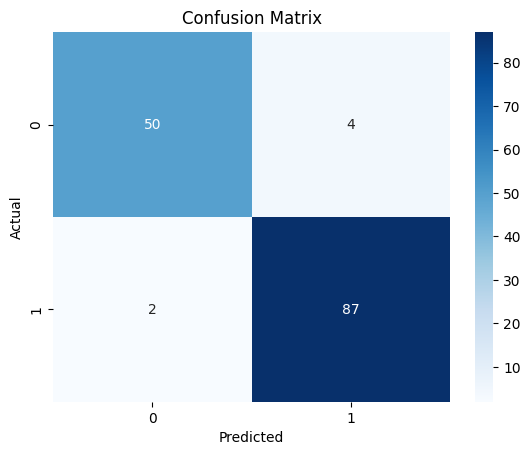

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

In [88]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without class weights
model_no_weight = LogisticRegression(solver='liblinear', random_state=42)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)
print("Without class weights:\n", classification_report(y_test, y_pred_no_weight))

# With class weights
model_weight = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model_weight.fit(X_train, y_train)
y_pred_weight = model_weight.predict(X_test)
print("With class weights:\n", classification_report(y_test, y_pred_weight))


Without class weights:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       226
           1       0.47      0.33      0.39        24

    accuracy                           0.90       250
   macro avg       0.70      0.65      0.67       250
weighted avg       0.89      0.90      0.89       250

With class weights:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       226
           1       0.39      0.79      0.52        24

    accuracy                           0.86       250
   macro avg       0.68      0.83      0.72       250
weighted avg       0.92      0.86      0.88       250



# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

In [89]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Titanic dataset
df = pd.read_csv("titanic.csv")

# Fill missing values for Age and Fare, and convert Sex to numerical
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select features and target
df = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']]
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Titanic Accuracy:", accuracy_score(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without scaling
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(solver='liblinear', random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", acc_no_scaling)
print("Accuracy with scaling:", acc_scaling)


Accuracy without scaling: 0.958041958041958
Accuracy with scaling: 0.9790209790209791


# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

In [91]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9975031210986267


# 17. E3M Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

In [92]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(C=0.5, solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy with C=0.5:", accuracy_score(y_test, y_pred))


Accuracy with C=0.5: 1.0


# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

In [93]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X, y)
coefficients = model.coef_[0]

importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
importance["AbsCoefficient"] = importance["Coefficient"].abs()
importance = importance.sort_values("AbsCoefficient", ascending=False)
print(importance)


                    Feature  Coefficient  AbsCoefficient
0               mean radius     2.090746        2.090746
26          worst concavity    -1.580281        1.580281
11            texture error     1.252335        1.252335
20             worst radius     1.229456        1.229456
25        worst compactness    -1.136297        1.136297
28           worst symmetry    -0.688688        0.688688
27     worst concave points    -0.651279        0.651279
6            mean concavity    -0.641197        0.641197
5          mean compactness    -0.400875        0.400875
21            worst texture    -0.339195        0.339195
7       mean concave points    -0.337830        0.337830
24         worst smoothness    -0.283298        0.283298
8             mean symmetry    -0.223028        0.223028
4           mean smoothness    -0.152863        0.152863
22          worst perimeter    -0.117277        0.117277
1              mean texture     0.116299        0.116299
29  worst fractal dimension    

# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

In [94]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X, y)
coefficients = model.coef_[0]

importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
importance["AbsCoefficient"] = importance["Coefficient"].abs()
importance = importance.sort_values("AbsCoefficient", ascending=False)
print(importance)


                    Feature  Coefficient  AbsCoefficient
0               mean radius     2.090746        2.090746
26          worst concavity    -1.580281        1.580281
11            texture error     1.252335        1.252335
20             worst radius     1.229456        1.229456
25        worst compactness    -1.136297        1.136297
28           worst symmetry    -0.688688        0.688688
27     worst concave points    -0.651279        0.651279
6            mean concavity    -0.641197        0.641197
5          mean compactness    -0.400875        0.400875
21            worst texture    -0.339195        0.339195
7       mean concave points    -0.337830        0.337830
24         worst smoothness    -0.283298        0.283298
8             mean symmetry    -0.223028        0.223028
4           mean smoothness    -0.152863        0.152863
22          worst perimeter    -0.117277        0.117277
1              mean texture     0.116299        0.116299
29  worst fractal dimension    

# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.9100817438692098


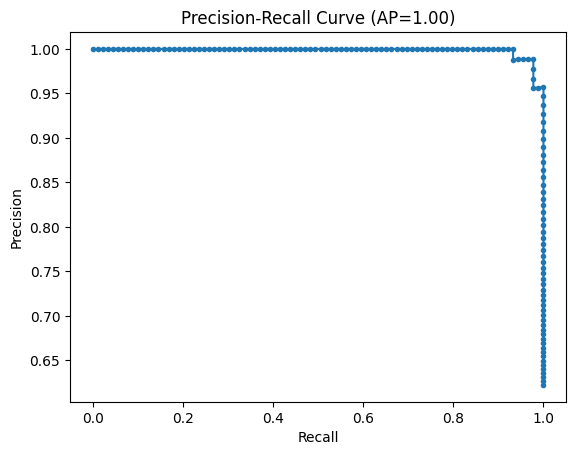

In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_scores = model.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={avg_precision:.2f})')
plt.show()


# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

In [98]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    # Note: Some solvers may require increasing max_iter
    model = LogisticRegression(solver=solver, multi_class='auto', random_state=42, max_iter=5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with {solver}: {accuracy_score(y_test, y_pred)}")


Accuracy with liblinear: 1.0
Accuracy with saga: 1.0
Accuracy with lbfgs: 1.0


# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

In [99]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.9104908126965126


# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model on raw data
model_raw = LogisticRegression(solver='liblinear', random_state=42)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Model on standardized data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
model_std = LogisticRegression(solver='liblinear', random_state=42)
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)
acc_std = accuracy_score(y_test, y_pred_std)

print("Accuracy on raw data:", acc_raw)
print("Accuracy on standardized data:", acc_std)


Accuracy on raw data: 0.958041958041958
Accuracy on standardized data: 0.9790209790209791


#  Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Optimal C:", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy with optimal C:", accuracy_score(y_test, y_pred))


Optimal C: {'C': 10}
Accuracy with optimal C: 1.0


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'logistic_model.joblib')

# Load the model from disk
loaded_model = joblib.load('logistic_model.joblib')
y_pred = loaded_model.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, y_pred))


Loaded model accuracy: 1.0
